## Loading Libraries

In [43]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
import random
import numpy as np
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.phrases import Phrases, Phraser
from pprint import pprint
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

## all 5 years

In [45]:
# Load your DataFrame from the CSV file
df = pd.read_csv('/content/all_reviews_with_sentiments(2018-2022).csv')

In [46]:
# convert float values to strings
df['Review'] = df['Review'].astype(str)

# tokenize documents
documents = [comment.split() for comment in df["Review"]]

# create dictionary and corpus
vocab = corpora.Dictionary(documents)
corpus = [vocab.doc2bow(text) for text in documents]

df

,Year,Data_Source,Review,sentiment_scores,sentiment_label
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340,positive
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806,negative
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169,positive
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658,negative
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280,positive
...,...,...,...,...,...
23294,2018,Trustpilot,fine flight attendant nice seat pretty comfort...,0.9153,positive
23295,2018,Trustpilot,time fly american airline business experience ...,0.7872,positive
23296,2018,Trustpilot,instance rude service ignore ofll describe ins...,0.9674,positive
23297,2018,Trustpilot,business class ticket access complimentary pre...,0.9042,positive


In [47]:
# set hyperparameters
num_topics_all = 11
alpha_all = 0.1  # Hyperparameter for document-topic distribution
eta = 0.01  # hyperparameter for topic-word distribution, determined automatically by Gensim

# Set the random seed
np.random.seed(880)

# create LDA model with hyperparameters
lda_all = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                      id2word=vocab,
                                     num_topics=num_topics_all,
                                      alpha=alpha_all,
                                      eta=eta)

# print the top 10 words in each topic
pprint(lda_all.show_topics(num_topics=11, num_words=10))

[(0,
  '0.064*"seat" + 0.040*"flight" + 0.021*"class" + 0.016*"good" + 0.016*"leg" '
  '+ 0.015*"room" + 0.014*"plane" + 0.014*"economy" + 0.012*"service" + '
  '0.012*"food"'),
 (1,
  '0.066*"airline" + 0.049*"american" + 0.035*"fly" + 0.024*"customer" + '
  '0.021*"service" + 0.018*"ticket" + 0.016*"use" + 0.016*"flight" + '
  '0.015*"travel" + 0.014*"bad"'),
 (2,
  '0.074*"flight" + 0.034*"delay" + 0.032*"hour" + 0.024*"airline" + '
  '0.018*"american" + 0.016*"miss" + 0.015*"customer" + 0.014*"dallas" + '
  '0.014*"connect" + 0.014*"time"'),
 (3,
  '0.029*"seat" + 0.024*"flight" + 0.023*"pay" + 0.021*"tell" + 0.021*"ask" + '
  '0.016*"book" + 0.013*"ticket" + 0.012*"credit" + 0.011*"phone" + '
  '0.011*"charge"'),
 (4,
  '0.038*"flight" + 0.015*"airline" + 0.013*"luggage" + 0.009*"american" + '
  '0.008*"claim" + 0.008*"bag" + 0.008*"time" + 0.008*"passenger" + '
  '0.008*"delay" + 0.007*"customer"'),
 (5,
  '0.078*"flight" + 0.044*"time" + 0.031*"change" + 0.024*"hour" + 0.019*"df

In [48]:
# Calculate coherence score for
coherence_model_all = CoherenceModel(model=lda_all, texts=documents, dictionary=vocab, coherence='c_v')
coherence_score_all= coherence_model_all.get_coherence()
print("Coherence Score for:", coherence_score_all)

Coherence Score for: 0.5072848010380211


In [49]:
df.head()

,Year,Data_Source,Review,sentiment_scores,sentiment_label
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340,positive
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806,negative
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169,positive
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658,negative
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280,positive


In [50]:
# create a new column in the DataFrame with the topic assigned to each document
# define a function to get the topic with the highest probability in a document
def get_document_topic(doc_bow):
    topics = lda_all.get_document_topics(doc_bow, minimum_probability=0.0)
    topics_sorted = sorted(topics, key=lambda x: x[1], reverse=True)
    return topics_sorted[0][0]

# create a new column 'Topic' in the DataFrame with the topic assigned to each document
df['Topic'] = [get_document_topic(doc_bow) for doc_bow in corpus]

# Print the DataFrame with the 'Topic' column
df.head()

,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340,positive,1
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806,negative,6
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169,positive,7
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658,negative,1
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280,positive,1


In [51]:
topic_mapping = {
    0: "Seating and Comfort Experience" ,
    1: 'Ticketing Services',
    2: "Flight Delays",
    3: 'Ticket Prices',
    4: 'Baggage Handling',
    5: "Flight Timing and Schedule Changes",
    6: 'Baggage Check-in Information',
    7: "Positive Attendent Service",
    8: "Flight Reschedule Arrangements",
    9: "Flight Gate Information",
    10:"Flight Cancellations"
}

# Apply the mapping on the existing 'Topic' column
df['Topic'] = df['Topic'].replace(topic_mapping)

# Print the DataFrame with the 'Topic' column renamed to topic names
df.head()

,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340,positive,Ticketing Services
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806,negative,Baggage Check-in Information
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169,positive,Positive Attendent Service
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658,negative,Ticketing Services
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280,positive,Ticketing Services


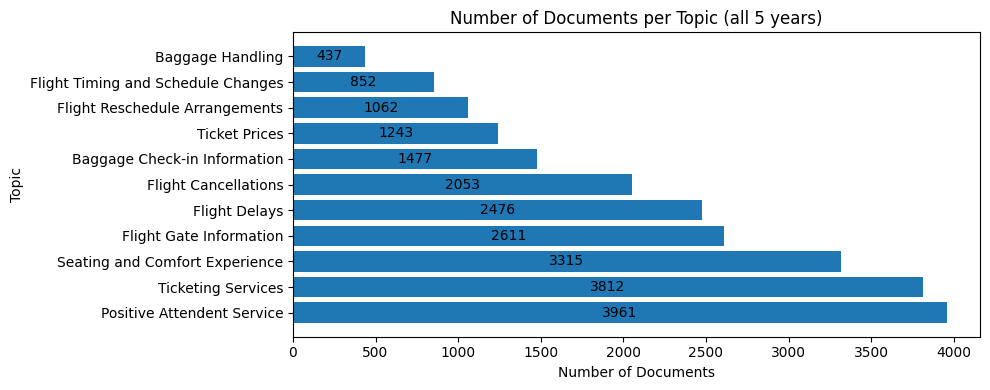

In [52]:
# Count the occurrences of each topic in the 'Topic' column
topic_counts = df['Topic'].value_counts()

# Create a bar chart to visualize the topics and the number of documents assigned to each topic
plt.figure(figsize=(10, 4))  # Adjust the figure size according to your preference
bars = plt.barh(topic_counts.index, topic_counts.values)
plt.ylabel('Topic')
plt.xlabel('Number of Documents')
plt.title('Number of Documents per Topic (all 5 years)')

# Add counts of documents in the middle of the bars
for bar, count in zip(bars, topic_counts.values):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, str(count), ha='center', va='center')

plt.tight_layout()  # To prevent overlapping labels
plt.show()

Average Sentiment Score for Each Topic (all 5 years):
Topic
Baggage Check-in Information          0.108022
Baggage Handling                     -0.041996
Flight Cancellations                 -0.421731
Flight Delays                        -0.409500
Flight Gate Information              -0.244702
Flight Reschedule Arrangements       -0.377093
Flight Timing and Schedule Changes   -0.045284
Positive Attendent Service            0.613981
Seating and Comfort Experience        0.469755
Ticket Prices                         0.128858
Ticketing Services                    0.032867
Name: sentiment_scores, dtype: float64


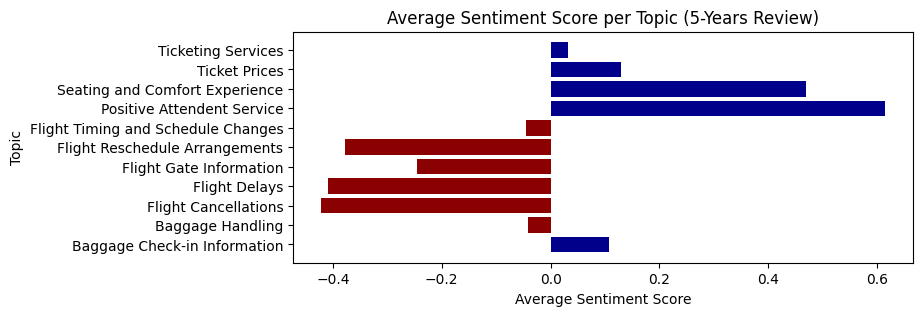

In [53]:
# Group by 'Topic' and calculate the average sentiment score for each topic
topic_sentiment_all = df.groupby('Topic')['sentiment_scores'].mean()

# Print the average sentiment score for each topic
print("Average Sentiment Score for Each Topic (all 5 years):")
print(topic_sentiment_all)

import numpy as np

# Create a bar chart to visualize the average sentiment score for each topic
plt.figure(figsize=(8, 3))

# Define colors based on sentiment scores
colors = ['darkred' if score < 0 else 'darkblue' for score in topic_sentiment_all.values]

plt.barh(topic_sentiment_all.index, topic_sentiment_all.values, color=colors)  # Use barh for horizontal bars
plt.xlabel('Average Sentiment Score')  # Swap x-axis and y-axis labels
plt.ylabel('Topic')  # Swap x-axis and y-axis labels
plt.title('Average Sentiment Score per Topic (5-Years Review)')

plt.show()

In [54]:
# Create a dictionary from the topic_sentiment Series
topic_sentiment_dict_all = topic_sentiment_all.to_dict()

# Map the average sentiment scores to the 'Topic' column in the original DataFrame
df['Topic_Sentiment_Score'] = df['Topic'].map(topic_sentiment_dict_all)


In [55]:
# Function to label topics based on average sentiment score
def label_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

# Apply the function to each topic in the DataFrame
df['Topic_Sentiment'] = df['Topic_Sentiment_Score'].apply(lambda score: label_sentiment(score))

# Print the DataFrame to verify the new columns
df

,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic,Topic_Sentiment_Score,Topic_Sentiment
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340,positive,Ticketing Services,0.032867,positive
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806,negative,Baggage Check-in Information,0.108022,positive
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169,positive,Positive Attendent Service,0.613981,positive
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658,negative,Ticketing Services,0.032867,positive
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280,positive,Ticketing Services,0.032867,positive
...,...,...,...,...,...,...,...,...
23294,2018,Trustpilot,fine flight attendant nice seat pretty comfort...,0.9153,positive,Seating and Comfort Experience,0.469755,positive
23295,2018,Trustpilot,time fly american airline business experience ...,0.7872,positive,Ticketing Services,0.032867,positive
23296,2018,Trustpilot,instance rude service ignore ofll describe ins...,0.9674,positive,Ticket Prices,0.128858,positive
23297,2018,Trustpilot,business class ticket access complimentary pre...,0.9042,positive,Ticket Prices,0.128858,positive


#### perplexity all 5 years

In [56]:
# Split data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize test documents
test_documents = [comment.split() for comment in test_df["Review"]]
test_corpus = [vocab.doc2bow(text) for text in test_documents]

# Calculate perplexity on the test data
total_likelihood = 0.0
total_words = 0

for doc_bow in test_corpus:
    doc_likelihood = 0.0
    doc_word_count = sum(cnt for _, cnt in doc_bow)

    for topic_id, word_count in lda_all.get_document_topics(doc_bow):
        word_prob = lda_all.get_topic_terms(topic_id, topn=None)
        topic_prob = sum(prob for _, prob in word_prob)
        doc_likelihood += word_count * topic_prob

    total_likelihood += doc_likelihood
    total_words += doc_word_count

perplexity = np.exp(-total_likelihood / total_words)
print(f"Perplexity on Test Data: {perplexity}")


Perplexity on Test Data: 0.9655177059953935
